###**READ THE DATA**

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/NandhiniR1989/MLDataset/refs/heads/main/Women%20Dresses%20Reviews%20Dataset%20.csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [2]:
df.tail()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1
23485,23485,56,General,Jackets,Jackets,984,NaN,Super cute jacket .perfect for fall i can't st...,0,5,1


In [3]:
df.shape

(23486, 11)

###**EXPLORATORY DATA ANALYSIS**

#**Rename the columns**

In [4]:
df.rename(columns= {
    'class_name': 'clothing_class',
    'title': 'review_title',
    'review_text': 'review_content',
    'alike_feedback_count': 'feedback_likes',
    'rating': 'review_rating',
    'recommend_index': 'recommendation'
    }, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   s.no              23486 non-null  int64 
 1   age               23486 non-null  int64 
 2   division_name     23472 non-null  object
 3   department_name   23472 non-null  object
 4   clothing_class    23472 non-null  object
 5   clothing_id       23486 non-null  int64 
 6   review_title      19676 non-null  object
 7   review_content    22641 non-null  object
 8   feedback_likes    23486 non-null  int64 
 9   review_rating     23486 non-null  int64 
 10  recommend_index   23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#**Identify the Missing Value and Handle Missing Value**

In [6]:
df.isnull().sum()

,0
s.no,0
age,0
division_name,14
department_name,14
clothing_class,14
clothing_id,0
review_title,3810
review_content,845
feedback_likes,0
review_rating,0


In [7]:
# Drop S.No
# Drop columns with a high number of missing values
df.drop(columns=['s.no', 'review_title', 'review_content'], inplace=True)

In [8]:
df.columns

Index(['age', 'division_name', 'department_name', 'clothing_class',
       'clothing_id', 'feedback_likes', 'review_rating', 'recommend_index '],
      dtype='object')

#**Imputation**

In [9]:
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE CATEGORICAL COLUMNS
print(categorical_cols)

Index(['division_name', 'department_name', 'clothing_class'], dtype='object')


#**Identifying unique values in categorical features**

In [10]:
#Check Unique Value count in Categorical Columns:
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()}")

division_name: 3
department_name: 6
clothing_class: 20


In [11]:
# Identify the unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

division_name: 	 ['General', 'General Petite', 'Initmates', nan]
department_name: 	 ['Bottoms', 'Tops', 'Intimate', 'Jackets', 'Dresses', 'Trend', nan]
clothing_class: 	 ['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits', 'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge', 'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering', nan, 'Casual bottoms', 'Chemises']


In [12]:
#   Fill null values with their respective mode
categorical_cols =  df.select_dtypes(include=['object']).columns     # IDENTIFY THE UPDATED CATEGORICAL COLUMNS
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Identify the UPDATED unique values in categorical columns:

for col in categorical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

division_name: 	 ['General', 'General Petite', 'Initmates']
department_name: 	 ['Bottoms', 'Tops', 'Intimate', 'Jackets', 'Dresses', 'Trend']
clothing_class: 	 ['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits', 'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge', 'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering', 'Casual bottoms', 'Chemises']


In [14]:
df[categorical_cols].isnull().sum()

,0
division_name,0
department_name,0
clothing_class,0


#**Added a Column Name Price**

In [15]:
import numpy as np

# Setting a seed to ensure reproducibility of random numbers
np.random.seed(42)
# Adding random price values between 100 and 1000
df['price'] = np.random.uniform(100, 1000, size=len(df))
# Now, the random prices will be fixed and won't change on rerun

In [16]:
df.columns

Index(['age', 'division_name', 'department_name', 'clothing_class',
       'clothing_id', 'feedback_likes', 'review_rating', 'recommend_index ',
       'price'],
      dtype='object')

#**Summary statistics of numerical features**

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns #IDENTIFY NUMERICAL COLUMNS

In [18]:
df[numerical_cols].isnull().sum()

,0
age,0
clothing_id,0
feedback_likes,0
review_rating,0
recommend_index,0
price,0


In [19]:
df[numerical_cols].describe().round()

,age,clothing_id,feedback_likes,review_rating,recommend_index,price
count,23486.0,23486.0,23486.0,23486.0,23486.0,23486.0
mean,43.0,918.0,3.0,4.0,1.0,551.0
std,12.0,203.0,6.0,1.0,0.0,260.0
min,18.0,0.0,0.0,1.0,0.0,100.0
25%,34.0,861.0,0.0,4.0,1.0,327.0
50%,41.0,936.0,1.0,5.0,1.0,552.0
75%,52.0,1078.0,3.0,5.0,1.0,776.0
max,99.0,1205.0,122.0,5.0,1.0,1000.0


In [20]:
df.head()

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommend_index,price
0,40,General,Bottoms,Jeans,1028,0,5,1,437.086107
1,62,General Petite,Tops,Blouses,850,12,5,1,955.642876
2,47,General Petite,Bottoms,Skirts,993,3,1,0,758.794548
3,45,General Petite,Bottoms,Pants,1068,0,5,1,638.792636
4,37,Initmates,Intimate,Swim,24,0,5,1,240.416776


#**Handle duplicates if any**

In [21]:
df.duplicated().sum()

0

#**Distribution Of Categorical Columns**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

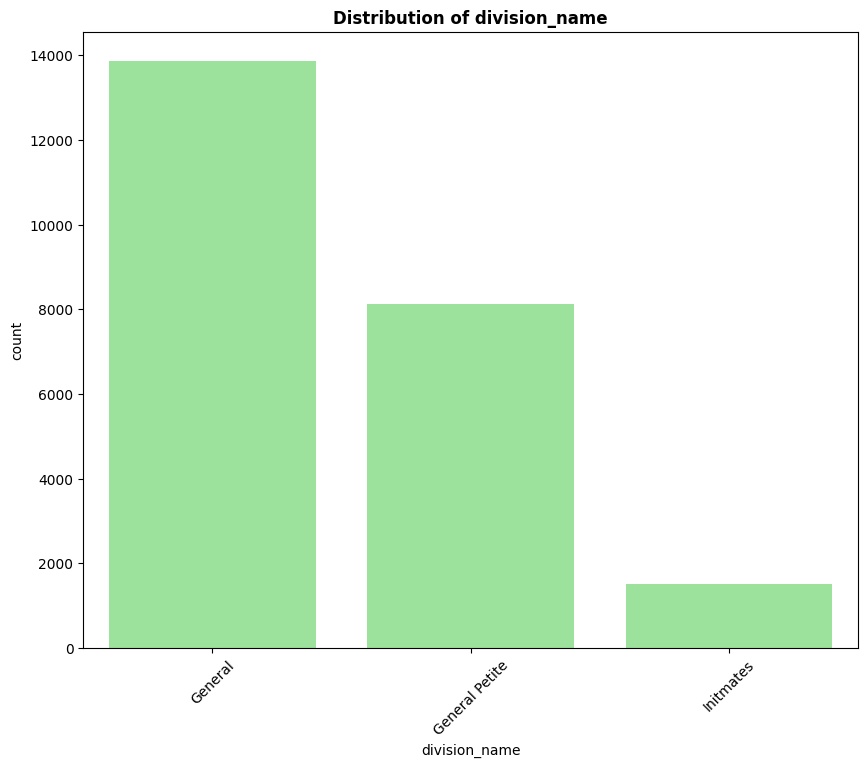

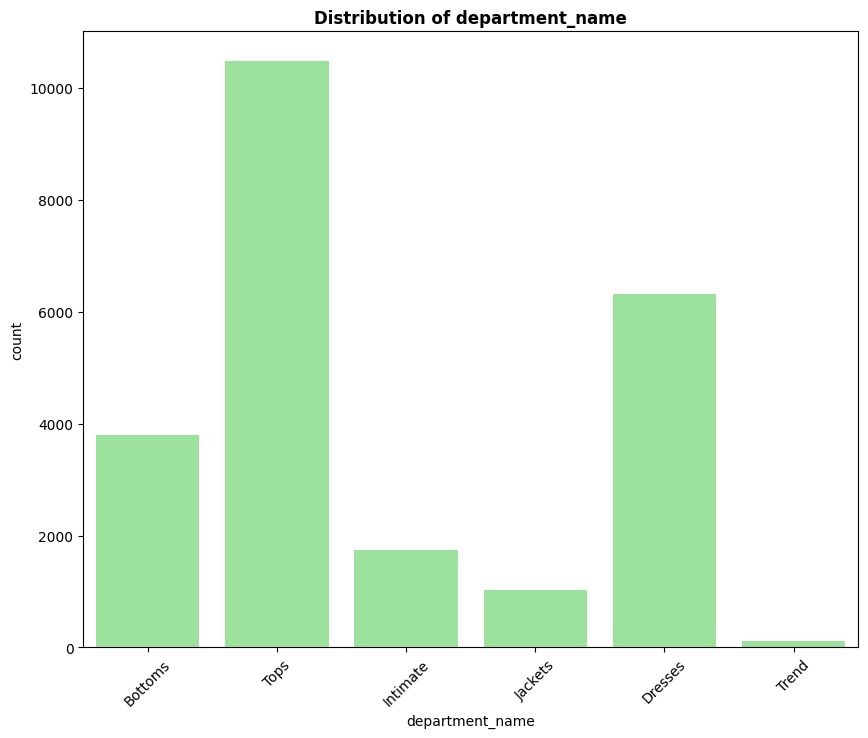

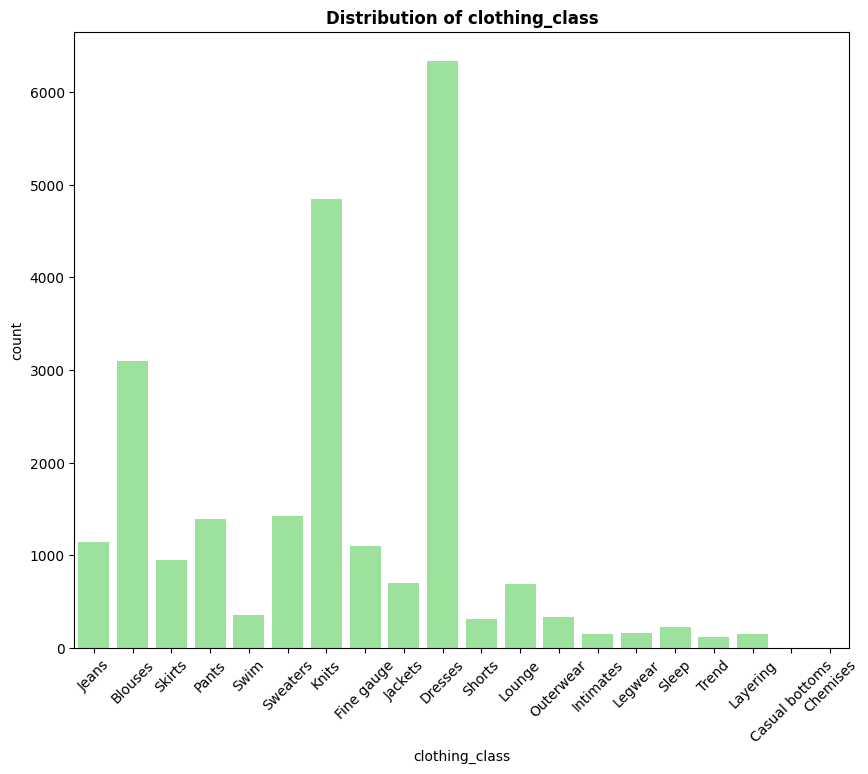

In [23]:
for col in categorical_cols:
  plt.figure(figsize=(10, 8))
  sns.countplot(data=df, x=col ,color = 'LightGreen')
  plt.title(f"Distribution of {col}", fontweight = 'bold')
  plt.xticks(rotation=45)
  plt.show()



#**Distribution of Numerical Columns**

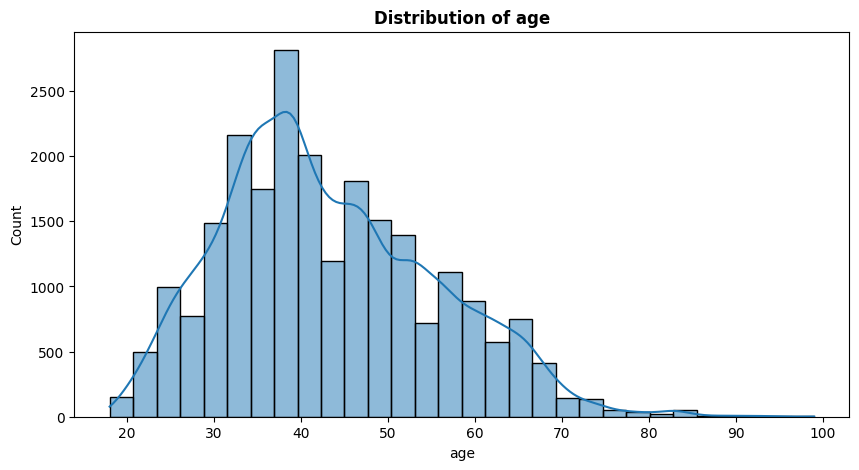

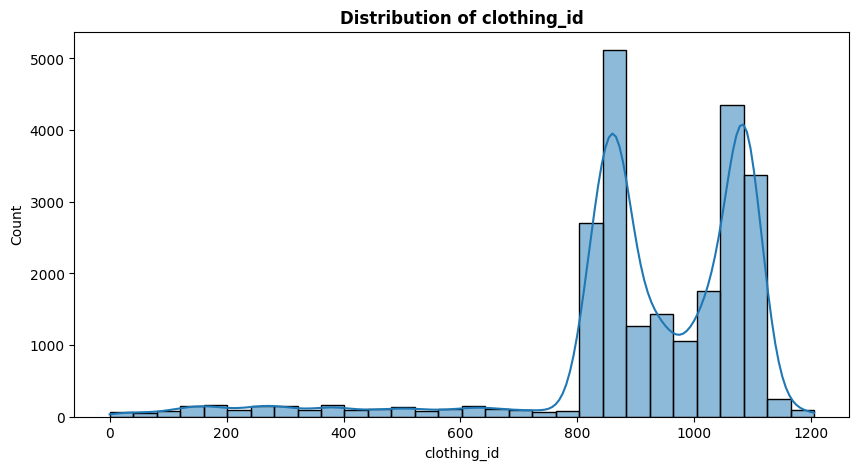

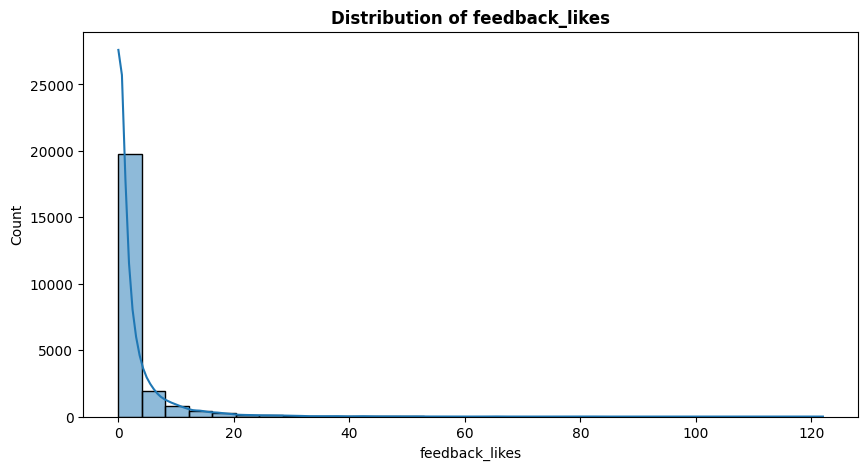

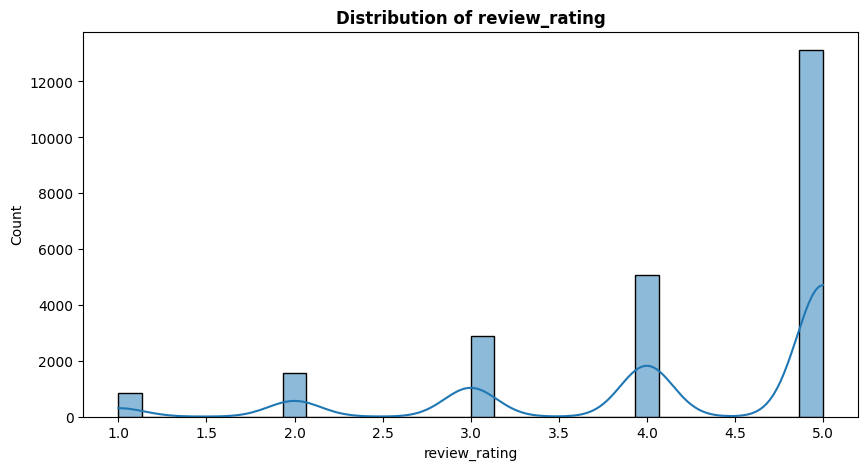

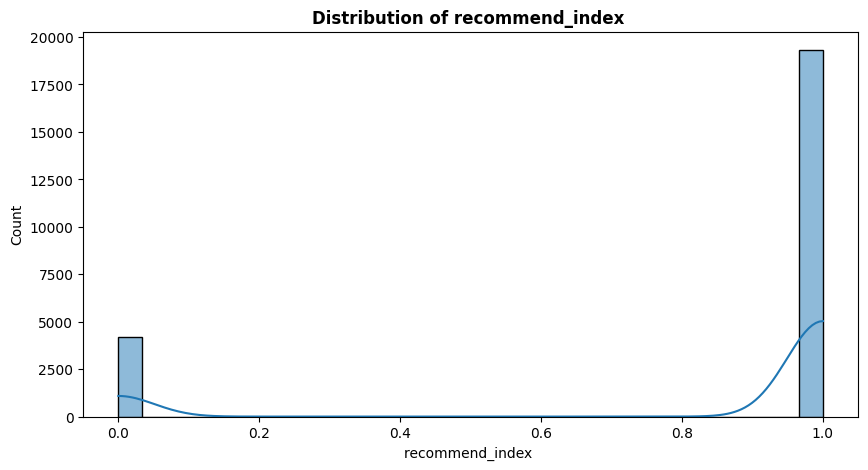

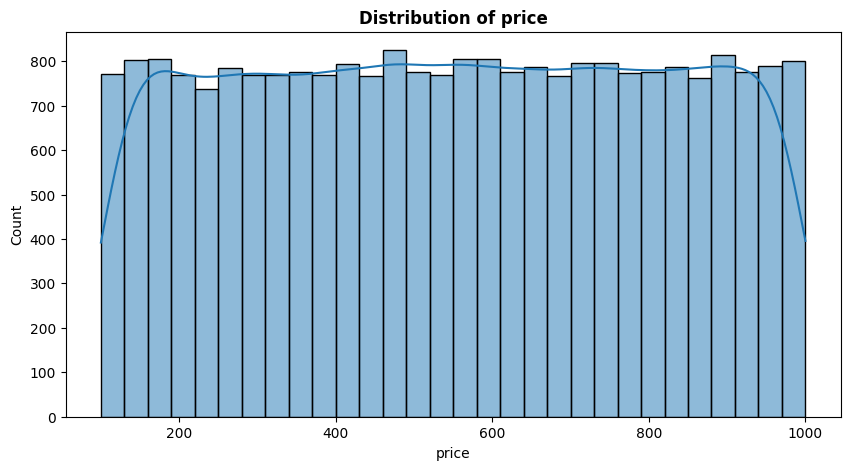

In [24]:
# Plot histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Histogram
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}',fontweight='bold')
    plt.show()

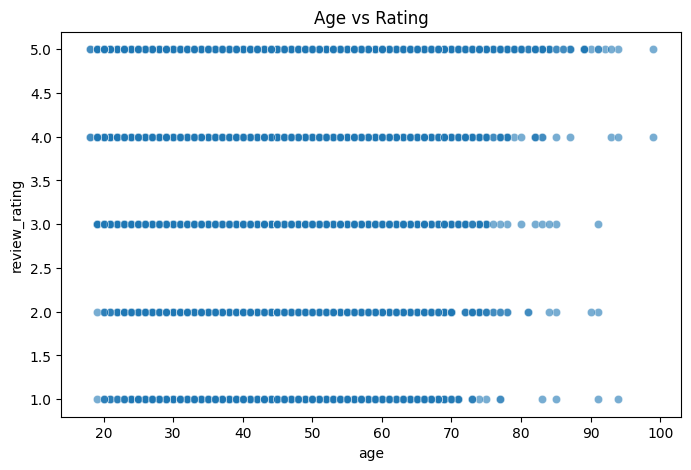

In [25]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='review_rating', alpha=0.6)
plt.title("Age vs Rating")
plt.show()

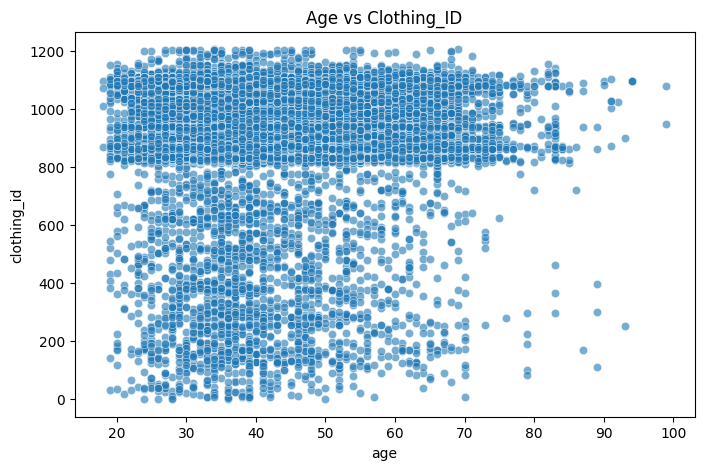

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='clothing_id', alpha=0.6)
plt.title("Age vs Clothing_ID")
plt.show()

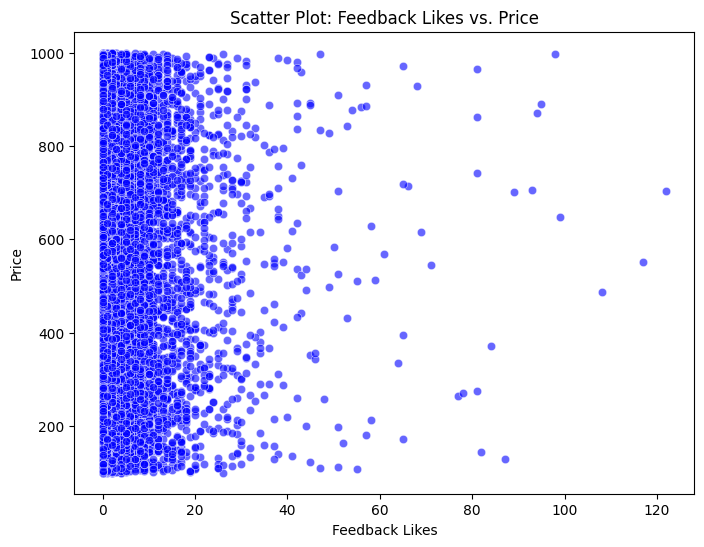

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='feedback_likes', y='price', color='blue', alpha=0.6)
plt.title("Scatter Plot: Feedback Likes vs. Price")
plt.xlabel("Feedback Likes")
plt.ylabel("Price")
plt.show()

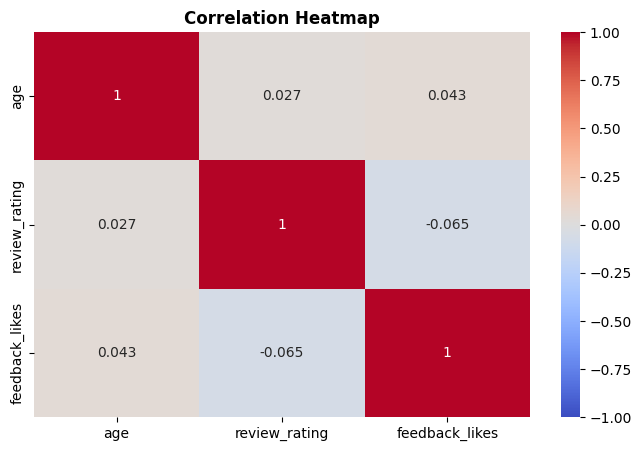

In [28]:

# Compute the correlation matrix
corr_matrix = df[['age','review_rating','feedback_likes']].corr()

# Set up the figure size
plt.figure(figsize=(8, 5))

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

###**DATA PREPROCESSING**

In [29]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [30]:
df.head()

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommend_index,price
0,40,0,0,7,1028,0,5,1,437.086107
1,62,1,4,0,850,12,5,1,955.642876
2,47,1,0,15,993,3,1,0,758.794548
3,45,1,0,13,1068,0,5,1,638.792636
4,37,2,2,18,24,0,5,1,240.416776


In [31]:
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=5)
imputed_array =imputer.fit_transform(df)
df=pd.DataFrame(imputed_array,columns=df.columns)

In [32]:
df.isnull().sum()

,0
age,0
division_name,0
department_name,0
clothing_class,0
clothing_id,0
feedback_likes,0
review_rating,0
recommend_index,0
price,0


#**OUTLIERS**

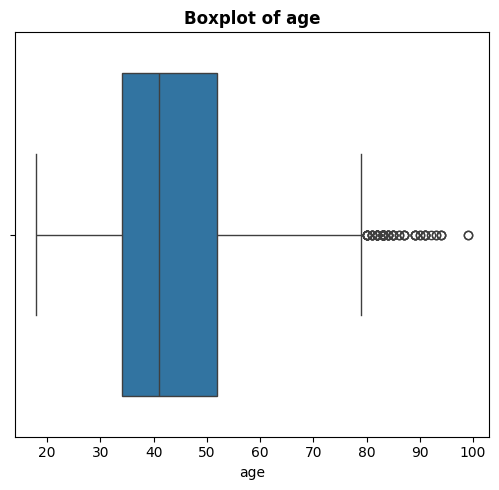

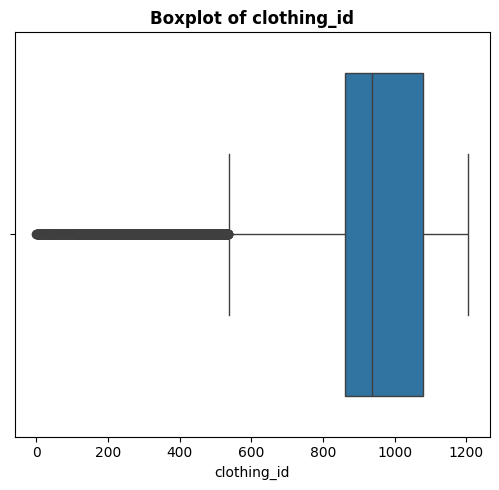

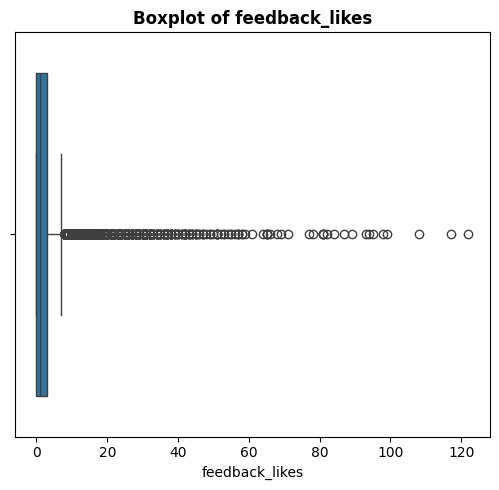

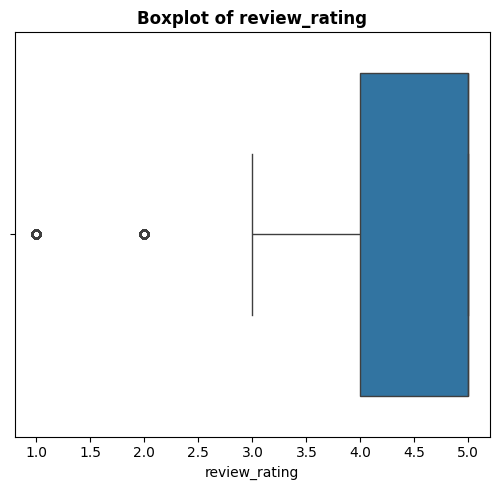

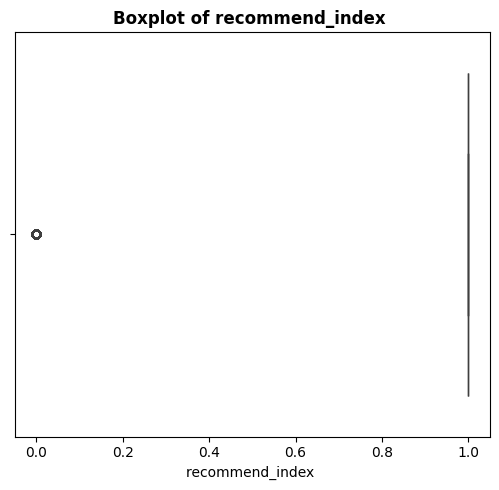

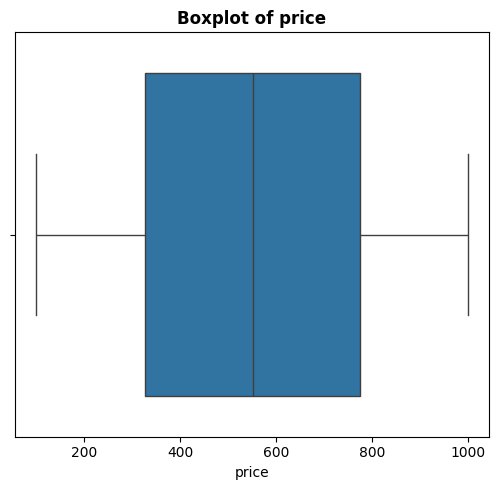

In [33]:
# BOXPLOT WITH OUTLIERS

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}', fontweight='bold')
    plt.tight_layout()
    plt.show()


In [34]:
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df = df[(df[column] >= Q1-1.5 *IQR) & (df[column] <= Q3+1.5*IQR)]

print(f"Column: \nQ1: {Q1},\nQ3: {Q3}, \nIQR: {IQR}, \nLower Bound: {lower_bound}, \nUpper Bound: {upper_bound}")

Column: 
Q1: 327.03976952293357,
Q3: 776.069210419345, 
IQR: 449.0294408964115, 
Lower Bound: -346.50439182168367, 
Upper Bound: 1449.6133717639623


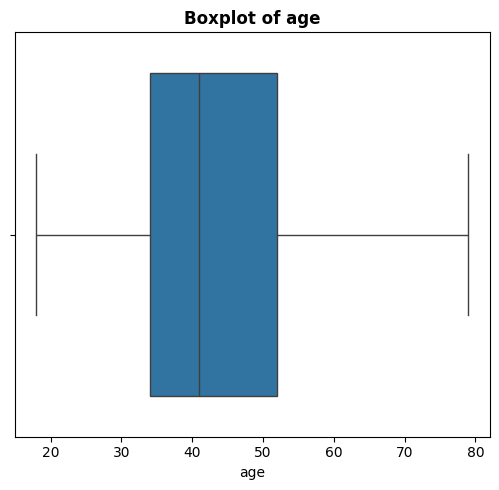

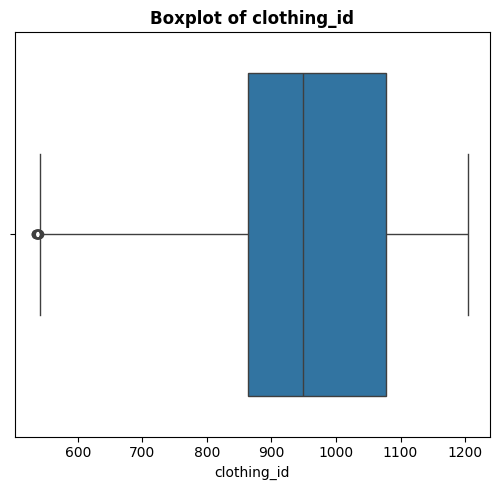

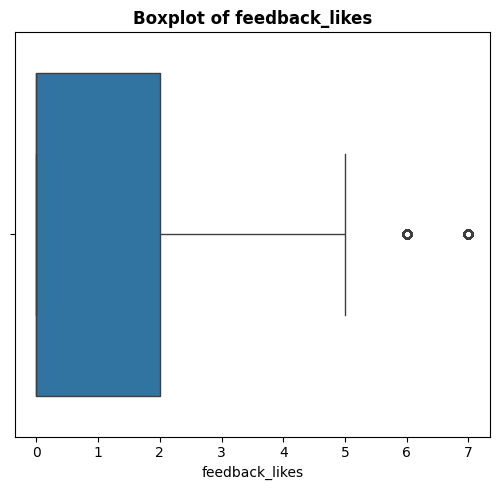

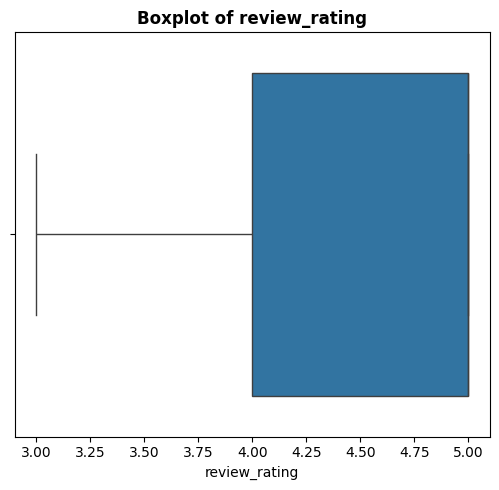

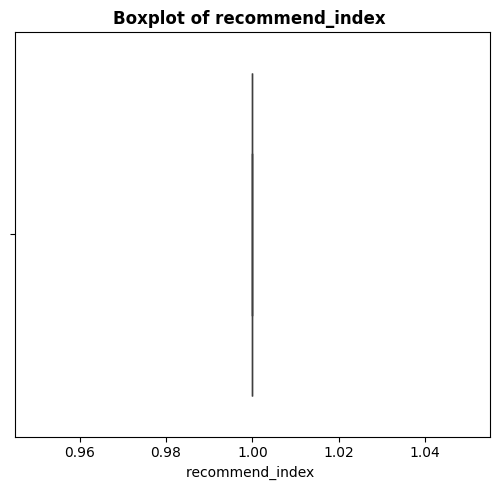

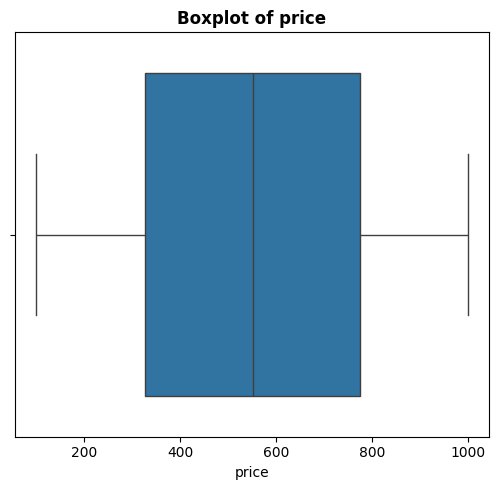

In [35]:
#BOXPLOT AFTER REMOVING OUTLIERS

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}', fontweight='bold')
    plt.tight_layout()
    plt.show()


#**Skewness**

In [36]:
from scipy.stats import skew
# Calculate skewness for each numerical feature
skewness = df[numerical_cols].skew()
print("\nSkewness of Numerical Features Transformation:")
print(skewness)


Skewness of Numerical Features Transformation:
age                 0.392053
clothing_id        -0.380555
feedback_likes      1.682103
review_rating      -1.319471
recommend_index     0.000000
price              -0.005381
dtype: float64


In [37]:
skwness = df[["division_name","department_name","clothing_class"]]
for col in skwness:
  df[col] =df[col]**0.5

df.head()

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommend_index,price
0,40.0,0.0,0.0,2.645751,1028.0,0.0,5.0,1.0,437.086107
3,45.0,1.0,0.0,3.605551,1068.0,0.0,5.0,1.0,638.792636
5,43.0,0.0,2.0,4.123106,933.0,0.0,4.0,1.0,240.395068
7,34.0,0.0,2.0,2.828427,868.0,2.0,5.0,1.0,879.558531
8,49.0,1.0,2.0,2.000000,900.0,4.0,5.0,1.0,641.003511


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16330 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               16330 non-null  float64
 1   division_name     16330 non-null  float64
 2   department_name   16330 non-null  float64
 3   clothing_class    16330 non-null  float64
 4   clothing_id       16330 non-null  float64
 5   feedback_likes    16330 non-null  float64
 6   review_rating     16330 non-null  float64
 7   recommend_index   16330 non-null  float64
 8   price             16330 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


###**FEATURE SELECTION**

In [57]:
X = df.drop(columns=['age', 'division_name'])
y = df['feedback_likes']

In [58]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
# 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13064, 7), (3266, 7), (13064,), (3266,))

In [60]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [61]:
selected_features = X.columns[selector.get_support()]
selected_features

Index(['department_name', 'clothing_class', 'clothing_id', 'feedback_likes',
       'review_rating', 'recommend_index ', 'price'],
      dtype='object')

In [62]:
df.head().round(1)

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommend_index,price
0,40.0,0.0,0.0,2.6,1028.0,0.0,5.0,1.0,437.1
3,45.0,1.0,0.0,3.6,1068.0,0.0,5.0,1.0,638.8
5,43.0,0.0,2.0,4.1,933.0,0.0,4.0,1.0,240.4
7,34.0,0.0,2.0,2.8,868.0,2.0,5.0,1.0,879.6
8,49.0,1.0,2.0,2.0,900.0,4.0,5.0,1.0,641.0


###**FEATURE SCALING**

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [64]:
df.head()

,age,division_name,department_name,clothing_class,clothing_id,feedback_likes,review_rating,recommend_index,price
0,40.0,0.0,0.0,2.645751,1028.0,0.0,5.0,1.0,437.086107
3,45.0,1.0,0.0,3.605551,1068.0,0.0,5.0,1.0,638.792636
5,43.0,0.0,2.0,4.123106,933.0,0.0,4.0,1.0,240.395068
7,34.0,0.0,2.0,2.828427,868.0,2.0,5.0,1.0,879.558531
8,49.0,1.0,2.0,2.000000,900.0,4.0,5.0,1.0,641.003511
